In [1]:
import pandas as pd

In [2]:
#data loading
d=pd.read_csv("Salary_dataset.csv")
d

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
#data cleaning
d=d.drop("Unnamed: 0",axis="columns")
d

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [4]:
d.columns[d.isna().any()]

Index([], dtype='object')

In [5]:
#data exploration
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
d.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
#feature engineering
import numpy as np
x=d["YearsExperience"]
y=d["Salary"]
x=np.array(x).reshape(-1,1)
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

array([[ 1.2],
       [ 2.3],
       [ 5.2],
       [ 3. ],
       [ 4.2],
       [ 4.1],
       [ 8. ],
       [ 1.4],
       [ 1.6],
       [ 9.1],
       [ 2.1],
       [ 7.2],
       [ 9.6],
       [ 6. ],
       [10.6],
       [ 6.9],
       [ 3.3],
       [ 4. ],
       [ 4.6],
       [ 6.1],
       [ 3.1]])

In [9]:
x_test

array([[ 9.7],
       [ 5. ],
       [ 8.3],
       [ 5.4],
       [ 3.3],
       [ 3.8],
       [10.4],
       [ 8.8],
       [ 4.1]])

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(x_test)
y_pred

array([115574.62288352,  71680.93878159, 102499.90847018,  75416.57147111,
        55804.4998511 ,  60474.04071301, 122111.98009019, 107169.44933209,
        63275.76523015])

In [12]:
y_test

,Salary
27,112636.0
15,67939.0
23,113813.0
17,83089.0
8,64446.0
9,57190.0
28,122392.0
24,109432.0
12,56958.0


In [17]:
lr.coef_

array([9339.08172382])

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9414466227178215

In [18]:
lr.intercept_

np.float64(24985.53016251169)

In [16]:
from sklearn.metrics import mean_absolute_error
r2_score(y_test,y_pred)
mean_absolute_error(y_test,y_pred)

5161.328710400178

In [20]:
lr.predict([[6]])

array([81020.0205054])

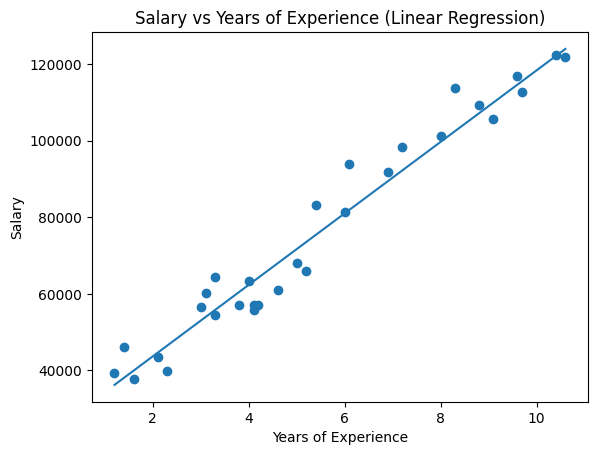

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create line values
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = lr.predict(x_line)

# Plot actual data points
plt.figure()
plt.scatter(x, y)
plt.plot(x_line, y_line)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience (Linear Regression)")
plt.show()
